##### 라이브러리

##### 라이브러리 설치

In [1]:
%pip install pandas

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

##### 라이브러리 불러오기

In [2]:
import pandas as pd
import ast

/var/folders/68/_mk2p_yn3m7d9ql2vw6vlbww0000gn/T/ipykernel_12360/4135976894.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 기사 데이터 정리 및 통계

### 1. 전체 기사 일자별 카운트

##### 삼성전자 뉴스 csv 불러오기

In [3]:
df_news = pd.read_csv("naver_news/naver_news_20230801_20230831.csv")
df_news.head()

,date,category,title,content,reaction
0,2023-08-01 01:15:00,세계,"니제르 쿠데타 군부 ""프랑스, 군사개입 공모"" 비난(종합)","전임 대통령 아들 포함 각료 4명·여당 대표 체포 중재 나선 차드 수반, '억류중'...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
1,2023-08-01 01:20:00,세계,"Trilateral summit of S. Korea, Japan, U.S. to ...",S Korea-US-Japan Trilateral summit of S. Korea...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
2,2023-08-01 01:26:00,정치,"필리핀 간 EU 수장, 中겨냥 작심발언…""불법 무력사용 용인불가""(종합)",신냉전 전 속 美 이어 EU도 필리핀과 관계 개선 모색…FTA 협상 재개키로 정빛...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': 5, '분석탁월': ..."
3,2023-08-01 02:10:00,세계,"머스크 엑스, SNS연구단체에 소송 위협…""광고주 몰아내려 음모""","엑스 ""CCDH, 우리 경쟁사서 자금지원 받아""…CCDH ""비판에 재갈 물리려는 것...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
4,2023-08-01 02:11:00,세계,"러 가스차단 겪은 유럽, '우라늄대국' 니제르 쿠데타에 전전긍긍","EU 우라늄 수입 20% 차지…원전 의존도 높은 프랑스도 '벌벌' ""니제르 사태 악...","{'쏠쏠정보': 3, '흥미진진': '0', '공감백배': 3, '분석탁월': 2,..."


##### date 열 데이터 변경

In [4]:
df_news["date"] = df_news["date"].apply(lambda x: x.split()[0].replace("-", ""))
df_news.head()

,date,category,title,content,reaction
0,20230801,세계,"니제르 쿠데타 군부 ""프랑스, 군사개입 공모"" 비난(종합)","전임 대통령 아들 포함 각료 4명·여당 대표 체포 중재 나선 차드 수반, '억류중'...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
1,20230801,세계,"Trilateral summit of S. Korea, Japan, U.S. to ...",S Korea-US-Japan Trilateral summit of S. Korea...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
2,20230801,정치,"필리핀 간 EU 수장, 中겨냥 작심발언…""불법 무력사용 용인불가""(종합)",신냉전 전 속 美 이어 EU도 필리핀과 관계 개선 모색…FTA 협상 재개키로 정빛...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': 5, '분석탁월': ..."
3,20230801,세계,"머스크 엑스, SNS연구단체에 소송 위협…""광고주 몰아내려 음모""","엑스 ""CCDH, 우리 경쟁사서 자금지원 받아""…CCDH ""비판에 재갈 물리려는 것...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
4,20230801,세계,"러 가스차단 겪은 유럽, '우라늄대국' 니제르 쿠데타에 전전긍긍","EU 우라늄 수입 20% 차지…원전 의존도 높은 프랑스도 '벌벌' ""니제르 사태 악...","{'쏠쏠정보': 3, '흥미진진': '0', '공감백배': 3, '분석탁월': 2,..."


##### 전체 기사 일자별 카운트

In [5]:
all = []
for day in range(1, 32):
    date_str = f"202308{day:02d}"
    count_all = len(df_news.loc[df_news["date"] == date_str])
    all.append({"날짜":date_str, "전체":count_all})

all

[{'날짜': '20230801', '전체': 939},
 {'날짜': '20230802', '전체': 1012},
 {'날짜': '20230803', '전체': 1119},
 {'날짜': '20230804', '전체': 854},
 {'날짜': '20230805', '전체': 381},
 {'날짜': '20230806', '전체': 552},
 {'날짜': '20230807', '전체': 839},
 {'날짜': '20230808', '전체': 1059},
 {'날짜': '20230809', '전체': 1034},
 {'날짜': '20230810', '전체': 1176},
 {'날짜': '20230811', '전체': 841},
 {'날짜': '20230812', '전체': 251},
 {'날짜': '20230813', '전체': 414},
 {'날짜': '20230814', '전체': 863},
 {'날짜': '20230815', '전체': 526},
 {'날짜': '20230816', '전체': 1029},
 {'날짜': '20230817', '전체': 1044},
 {'날짜': '20230818', '전체': 855},
 {'날짜': '20230819', '전체': 287},
 {'날짜': '20230820', '전체': 428},
 {'날짜': '20230821', '전체': 877},
 {'날짜': '20230822', '전체': 997},
 {'날짜': '20230823', '전체': 1094},
 {'날짜': '20230824', '전체': 1265},
 {'날짜': '20230825', '전체': 838},
 {'날짜': '20230826', '전체': 238},
 {'날짜': '20230827', '전체': 380},
 {'날짜': '20230828', '전체': 943},
 {'날짜': '20230829', '전체': 1101},
 {'날짜': '20230830', '전체': 1086},
 {'날짜': '20230831', '전체': 111

##### 데이터프레임 생성

In [6]:
count_all = pd.DataFrame(all)
count_all.head()

,날짜,전체
0,20230801,939
1,20230802,1012
2,20230803,1119
3,20230804,854
4,20230805,381


### 2. 본문이 비어있는 기사 등을 제외하고 크롤링한 기사 중 본문에 삼성전자 글자가 들어간 뉴스 분류

##### content 열에 NaN 값 제거

In [7]:
df_news.dropna(subset=["content"], inplace=True)
df_news.head()

,date,category,title,content,reaction
0,20230801,세계,"니제르 쿠데타 군부 ""프랑스, 군사개입 공모"" 비난(종합)","전임 대통령 아들 포함 각료 4명·여당 대표 체포 중재 나선 차드 수반, '억류중'...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
1,20230801,세계,"Trilateral summit of S. Korea, Japan, U.S. to ...",S Korea-US-Japan Trilateral summit of S. Korea...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
2,20230801,정치,"필리핀 간 EU 수장, 中겨냥 작심발언…""불법 무력사용 용인불가""(종합)",신냉전 전 속 美 이어 EU도 필리핀과 관계 개선 모색…FTA 협상 재개키로 정빛...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': 5, '분석탁월': ..."
3,20230801,세계,"머스크 엑스, SNS연구단체에 소송 위협…""광고주 몰아내려 음모""","엑스 ""CCDH, 우리 경쟁사서 자금지원 받아""…CCDH ""비판에 재갈 물리려는 것...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
4,20230801,세계,"러 가스차단 겪은 유럽, '우라늄대국' 니제르 쿠데타에 전전긍긍","EU 우라늄 수입 20% 차지…원전 의존도 높은 프랑스도 '벌벌' ""니제르 사태 악...","{'쏠쏠정보': 3, '흥미진진': '0', '공감백배': 3, '분석탁월': 2,..."


##### 'content' 열의 데이터에 '삼성전자'가 포함된 행을 필터링하여 날짜별 개수 카운트

In [8]:
df_samsung = df_news[df_news["content"].str.contains("삼성전자")].groupby("date").size().reset_index(name="본문")
df_samsung.head()

,date,본문
0,20230801,15
1,20230802,5
2,20230803,4
3,20230804,6
4,20230806,4


### 3. 삼성 주가데이터 합체 및 주가데이터가 없는 날짜 정리

##### 삼성전자 주식 csv 불러오기

In [9]:
df_stock = pd.read_csv("naver_stock/naver_stock_20230801_20230831.csv")
df_stock.head()

,date,end_price,change,start_price,high_price,low_price,volume
0,2023-08-01 00:00:00,"71,100","상승 1,300","70,100","71,200","70,000","12,299,254"
1,2023-08-02 00:00:00,"69,900","하락 1,200","70,700","71,000","69,800","13,835,020"
2,2023-08-03 00:00:00,"68,800","하락 1,100","69,900","70,200","68,500","20,087,090"
3,2023-08-04 00:00:00,"68,300",하락 500,"68,800","69,100","68,200","12,360,193"
4,2023-08-07 00:00:00,"68,500",상승 200,"67,700","69,200","67,600","10,968,505"


##### date 열 데이터 변경

In [10]:
df_stock["date"] = df_stock["date"].apply(lambda x: x.split()[0].replace("-", ""))
df_stock.head()

,date,end_price,change,start_price,high_price,low_price,volume
0,20230801,"71,100","상승 1,300","70,100","71,200","70,000","12,299,254"
1,20230802,"69,900","하락 1,200","70,700","71,000","69,800","13,835,020"
2,20230803,"68,800","하락 1,100","69,900","70,200","68,500","20,087,090"
3,20230804,"68,300",하락 500,"68,800","69,100","68,200","12,360,193"
4,20230807,"68,500",상승 200,"67,700","69,200","67,600","10,968,505"


##### end_price 열 데이터 형식 변경

In [11]:
df_stock["end_price"] = df_stock["end_price"].str.replace(",", "").astype(float)
df_stock.head()

,date,end_price,change,start_price,high_price,low_price,volume
0,20230801,71100.0,"상승 1,300","70,100","71,200","70,000","12,299,254"
1,20230802,69900.0,"하락 1,200","70,700","71,000","69,800","13,835,020"
2,20230803,68800.0,"하락 1,100","69,900","70,200","68,500","20,087,090"
3,20230804,68300.0,하락 500,"68,800","69,100","68,200","12,360,193"
4,20230807,68500.0,상승 200,"67,700","69,200","67,600","10,968,505"


##### df_stock에서 date와 end_price 열만 선택

In [12]:
df_stock_subset = df_stock[["date", "end_price"]]
df_stock_subset.head()

,date,end_price
0,20230801,71100.0
1,20230802,69900.0
2,20230803,68800.0
3,20230804,68300.0
4,20230807,68500.0


##### df_stock의 날짜를 기준으로 데이터프레임 병합

In [13]:
samsung = pd.merge(df_stock_subset, df_samsung, on="date", how="left")
samsung.head()

,date,end_price,본문
0,20230801,71100.0,15
1,20230802,69900.0,5
2,20230803,68800.0,4
3,20230804,68300.0,6
4,20230807,68500.0,4


##### 열 이름 변경

In [14]:
samsung = samsung.rename(columns={"date":"날짜", "end_price":"주가"})
samsung.head()

,날짜,주가,본문
0,20230801,71100.0,15
1,20230802,69900.0,5
2,20230803,68800.0,4
3,20230804,68300.0,6
4,20230807,68500.0,4


##### 데이터프레임 열 순서 변경

In [15]:
samsung = samsung[["날짜", "본문", "주가"]]
samsung

,날짜,본문,주가
0,20230801,15,71100.0
1,20230802,5,69900.0
2,20230803,4,68800.0
3,20230804,6,68300.0
4,20230807,4,68500.0
5,20230808,11,67600.0
6,20230809,16,68900.0
7,20230810,2,68000.0
8,20230811,7,67500.0
9,20230814,6,67300.0


##### 인덱스 재설정

In [16]:
samsung.set_index("날짜", inplace=True)
samsung

,본문,주가
날짜,,
20230801,15,71100.0
20230802,5,69900.0
20230803,4,68800.0
20230804,6,68300.0
20230807,4,68500.0
20230808,11,67600.0
20230809,16,68900.0
20230810,2,68000.0
20230811,7,67500.0


### 4. 수치를 백분위로 변경 ((날짜별 합 / 전체 합) * 100)

##### 본문 백분위

In [17]:
samsung["본문 백분위"] = (samsung["본문"] / samsung["본문"].sum()) * 100
samsung

,본문,주가,본문 백분위
날짜,,,
20230801,15,71100.0,8.241758
20230802,5,69900.0,2.747253
20230803,4,68800.0,2.197802
20230804,6,68300.0,3.296703
20230807,4,68500.0,2.197802
20230808,11,67600.0,6.043956
20230809,16,68900.0,8.791209
20230810,2,68000.0,1.098901
20230811,7,67500.0,3.846154


##### 삼성전자 주가 백분위

In [18]:
samsung["삼성전자 주가 백분위"] = (samsung["주가"] / samsung["주가"].sum()) * 100
samsung

,본문,주가,본문 백분위,삼성전자 주가 백분위
날짜,,,,
20230801,15,71100.0,8.241758,4.774696
20230802,5,69900.0,2.747253,4.694111
20230803,4,68800.0,2.197802,4.620240
20230804,6,68300.0,3.296703,4.586663
20230807,4,68500.0,2.197802,4.600094
20230808,11,67600.0,6.043956,4.539655
20230809,16,68900.0,8.791209,4.626956
20230810,2,68000.0,1.098901,4.566517
20230811,7,67500.0,3.846154,4.532939


# 관심도, 카테고리 데이터 통계

### 1. 삼성전자 기사 날짜별 관심도 정리

##### 본문에 삼성전자가 들어간 기사 추출

In [19]:
df_samsung = df_news[df_news["content"].str.contains("삼성전자")]
df_samsung.head()

,date,category,title,content,reaction
29,20230801,경제,올해 대기업집단 시총 350조원 증가…에코프로그룹 12조→70조,리더스인덱스 분석…삼성전자[005930] 포함 삼성그룹 98조원 증가 리더스인덱스 ...,"{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': '0', '분석탁월': ..."
60,20230801,경제,"삼성전자, 2023년 국내 판매 TV 3대 중 1대는 초대형 TV",삼성전자가 올해 1월부터 7월까지 국내에 판매한 Neo QLED·QLED TV 3...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
62,20230801,IT,"삼성전자, 부산 광안리서 갤Z5 출시 알리는 드론쇼",삼성전자는 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 개소...,"{'쏠쏠정보': '0', '흥미진진': 1, '공감백배': 4, '분석탁월': '0..."
66,20230801,경제,드론으로 표현한 '갤럭시 Z 플립5',삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
67,20230801,경제,"삼성전자, 갤럭시 스튜디오 오픈 기념 드론 라이트쇼 진행",삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."


##### 인덱스 재설정

In [20]:
df_samsung.set_index("date", inplace=True)
df_samsung.head()

,category,title,content,reaction
date,,,,
20230801,경제,올해 대기업집단 시총 350조원 증가…에코프로그룹 12조→70조,리더스인덱스 분석…삼성전자[005930] 포함 삼성그룹 98조원 증가 리더스인덱스 ...,"{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': '0', '분석탁월': ..."
20230801,경제,"삼성전자, 2023년 국내 판매 TV 3대 중 1대는 초대형 TV",삼성전자가 올해 1월부터 7월까지 국내에 판매한 Neo QLED·QLED TV 3...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
20230801,IT,"삼성전자, 부산 광안리서 갤Z5 출시 알리는 드론쇼",삼성전자는 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 개소...,"{'쏠쏠정보': '0', '흥미진진': 1, '공감백배': 4, '분석탁월': '0..."
20230801,경제,드론으로 표현한 '갤럭시 Z 플립5',삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
20230801,경제,"삼성전자, 갤럭시 스튜디오 오픈 기념 드론 라이트쇼 진행",삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."


##### 날짜별 기사 반응 합계 추출

In [21]:
reactions = {}

for date, dict in df_samsung["reaction"].items():
    reactions_dict = ast.literal_eval(dict)     # 문자열을 딕셔너리로 변환
    reaction_count = 0
    
    # 각 반응에 대해 숫자로 변환하여 더하기
    for count in reactions_dict.values():
        if isinstance(count, int):  # 값이 정수인 경우에만 처리
            reaction_count += count
            
    reactions[date] = reaction_count    # 각 날짜별 총 반응 수를 딕셔너리에 저장
    
reactions

{'20230801': 14,
 '20230802': 1,
 '20230803': 0,
 '20230804': 0,
 '20230806': 11,
 '20230807': 0,
 '20230808': 3,
 '20230809': 4,
 '20230810': 0,
 '20230811': 0,
 '20230812': 1,
 '20230813': 2,
 '20230814': 5,
 '20230815': 4,
 '20230816': 0,
 '20230817': 3,
 '20230818': 2,
 '20230820': 0,
 '20230821': 2,
 '20230822': 1,
 '20230823': 0,
 '20230824': 1,
 '20230825': 0,
 '20230826': 12,
 '20230827': 3,
 '20230828': 0,
 '20230829': 0,
 '20230830': 1,
 '20230831': 0}

##### 딕셔너리를 데이터프레임으로 변환

In [22]:
df_reaction = pd.DataFrame(list(reactions.items()), columns=["날짜", "반응도"])
df_reaction

,날짜,반응도
0,20230801,14
1,20230802,1
2,20230803,0
3,20230804,0
4,20230806,11
5,20230807,0
6,20230808,3
7,20230809,4
8,20230810,0
9,20230811,0


##### 인덱스 재설정

In [23]:
df_reaction.set_index("날짜", inplace=True)
df_reaction

,반응도
날짜,
20230801,14
20230802,1
20230803,0
20230804,0
20230806,11
20230807,0
20230808,3
20230809,4
20230810,0


### 2. 삼성전자 기사 카테고리별 합계

##### 삼성전자 기사 추출

In [24]:
df_category = df_news[df_news["content"].str.contains("삼성전자")]
df_category

,date,category,title,content,reaction
29,20230801,경제,올해 대기업집단 시총 350조원 증가…에코프로그룹 12조→70조,리더스인덱스 분석…삼성전자[005930] 포함 삼성그룹 98조원 증가 리더스인덱스 ...,"{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': '0', '분석탁월': ..."
60,20230801,경제,"삼성전자, 2023년 국내 판매 TV 3대 중 1대는 초대형 TV",삼성전자가 올해 1월부터 7월까지 국내에 판매한 Neo QLED·QLED TV 3...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
62,20230801,IT,"삼성전자, 부산 광안리서 갤Z5 출시 알리는 드론쇼",삼성전자는 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 개소...,"{'쏠쏠정보': '0', '흥미진진': 1, '공감백배': 4, '분석탁월': '0..."
66,20230801,경제,드론으로 표현한 '갤럭시 Z 플립5',삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
67,20230801,경제,"삼성전자, 갤럭시 스튜디오 오픈 기념 드론 라이트쇼 진행",삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
...,...,...,...,...,...
25325,20230831,경제,"삼성전자 ""스마트싱스 생태계 발전…'의미있는 연결' 확대""","'IFA 2023' 프레스 콘퍼런스…""유럽 소비자들, 스마트홈 혁신 기대"" 환경보호...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
25328,20230831,경제,"코닝 회장 ""한국에 초박막 벤더블 글라스 제조 공급망 구축""","'한국 투자 50주년' 간담회…충남 아산 생산라인 구축·양산 시작 웬델 윅스 ""코닝...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
25353,20230831,경제,"코닝 회장 ""한국에 세계 첫 벤더블 글라스 제조 공급망 구축""(종합)","'한국 투자 50주년' 간담회…충남 아산 생산라인 구축·양산 시작 웬델 윅스 ""코닝...","{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': 3, '분석탁월': '0..."
25414,20230831,경제,삼성 프레스 컨퍼런스서 기조연설하는 벤자민 브라운,삼성전자 유럽총괄 최고마케팅책임자(CMO) 벤자민 브라운이 독일 베를린 '메세 베...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."


##### category열 이름 변경

In [25]:
df_category.rename(columns={"category":"카테고리"}, inplace=True)
df_category

/var/folders/68/_mk2p_yn3m7d9ql2vw6vlbww0000gn/T/ipykernel_12360/2901468926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category.rename(columns={"category":"카테고리"}, inplace=True)


,date,카테고리,title,content,reaction
29,20230801,경제,올해 대기업집단 시총 350조원 증가…에코프로그룹 12조→70조,리더스인덱스 분석…삼성전자[005930] 포함 삼성그룹 98조원 증가 리더스인덱스 ...,"{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': '0', '분석탁월': ..."
60,20230801,경제,"삼성전자, 2023년 국내 판매 TV 3대 중 1대는 초대형 TV",삼성전자가 올해 1월부터 7월까지 국내에 판매한 Neo QLED·QLED TV 3...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
62,20230801,IT,"삼성전자, 부산 광안리서 갤Z5 출시 알리는 드론쇼",삼성전자는 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 개소...,"{'쏠쏠정보': '0', '흥미진진': 1, '공감백배': 4, '분석탁월': '0..."
66,20230801,경제,드론으로 표현한 '갤럭시 Z 플립5',삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
67,20230801,경제,"삼성전자, 갤럭시 스튜디오 오픈 기념 드론 라이트쇼 진행",삼성전자가 갤럭시 신제품을 체험할 수 있는 갤럭시 스튜디오 '부산 광안리' 오픈을...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
...,...,...,...,...,...
25325,20230831,경제,"삼성전자 ""스마트싱스 생태계 발전…'의미있는 연결' 확대""","'IFA 2023' 프레스 콘퍼런스…""유럽 소비자들, 스마트홈 혁신 기대"" 환경보호...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
25328,20230831,경제,"코닝 회장 ""한국에 초박막 벤더블 글라스 제조 공급망 구축""","'한국 투자 50주년' 간담회…충남 아산 생산라인 구축·양산 시작 웬델 윅스 ""코닝...","{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."
25353,20230831,경제,"코닝 회장 ""한국에 세계 첫 벤더블 글라스 제조 공급망 구축""(종합)","'한국 투자 50주년' 간담회…충남 아산 생산라인 구축·양산 시작 웬델 윅스 ""코닝...","{'쏠쏠정보': 1, '흥미진진': '0', '공감백배': 3, '분석탁월': '0..."
25414,20230831,경제,삼성 프레스 컨퍼런스서 기조연설하는 벤자민 브라운,삼성전자 유럽총괄 최고마케팅책임자(CMO) 벤자민 브라운이 독일 베를린 '메세 베...,"{'쏠쏠정보': '0', '흥미진진': '0', '공감백배': '0', '분석탁월'..."


##### 카테고리별 합계

In [26]:
count_category = df_category["카테고리"].value_counts()
count_category

카테고리
경제      129
IT       32
사회       23
세계       14
생활        4
정치        3
스포츠       1
오피니언      1
Name: count, dtype: int64

##### 카테고리별 합계 이름 변경

In [27]:
count_category.name = "본문"
count_category

카테고리
경제      129
IT       32
사회       23
세계       14
생활        4
정치        3
스포츠       1
오피니언      1
Name: 본문, dtype: int64

# 시각화

#### 라이브러리

##### 라이브러리 설치

In [28]:
!pip3 install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

##### 라이브러리 불러오기

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 1. 기사 버즈량 및 주가 비교 그래프
버즈량: 온라인상 실제 고객들을 통해 언급된 횟수

##### 그래프에 필요한 데이터 불러오기

In [30]:
samsung

,본문,주가,본문 백분위,삼성전자 주가 백분위
날짜,,,,
20230801,15,71100.0,8.241758,4.774696
20230802,5,69900.0,2.747253,4.694111
20230803,4,68800.0,2.197802,4.620240
20230804,6,68300.0,3.296703,4.586663
20230807,4,68500.0,2.197802,4.600094
20230808,11,67600.0,6.043956,4.539655
20230809,16,68900.0,8.791209,4.626956
20230810,2,68000.0,1.098901,4.566517
20230811,7,67500.0,3.846154,4.532939


##### x축 데이터 설정

In [31]:
x = samsung.index
x

Index(['20230801', '20230802', '20230803', '20230804', '20230807', '20230808',
       '20230809', '20230810', '20230811', '20230814', '20230816', '20230817',
       '20230818', '20230821', '20230822', '20230823', '20230824', '20230825',
       '20230828', '20230829', '20230830', '20230831'],
      dtype='object', name='날짜')

##### 기사 버즈량 그래프 y축 데이터 설정

In [32]:
article_y = samsung["본문"].values
article_y

array([15,  5,  4,  6,  4, 11, 16,  2,  7,  6,  7,  2,  6,  4, 16,  8, 14,
       14,  6, 10,  5, 14])

##### 주가 그래프 y축 데이터 설정

In [33]:
stock_y = samsung["주가"].values
stock_y

array([71100., 69900., 68800., 68300., 68500., 67600., 68900., 68000.,
       67500., 67300., 67000., 66700., 66300., 66600., 66600., 67100.,
       68200., 67100., 66800., 66800., 67100., 66900.])

##### 기사 버즈량 및 주가 비교 그래프

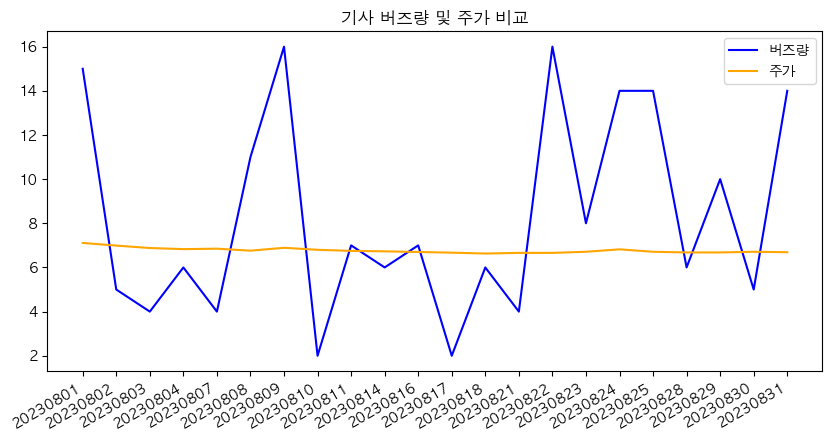

In [34]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

# 그래프 제목
ax.set_title('기사 버즈량 및 주가 비교') 

# 기사 버즈량 그래프 설정
ax.plot(x, article_y, 'blue', label='버즈량')

# 주가 그래프 설정
scaled_stock_y = [stock / 10000 for stock in stock_y] # 주가를 10000으로 나누어 스케일 조정 
ax.plot(x, scaled_stock_y, 'orange', label='주가')

fig.autofmt_xdate() # x축 레이블 텍스트 회전
ax.legend() # 범례 설정

plt.show() # 그래프 출력

### 2. 일자별 기사 관심도 그래프

##### 그래프에 필요한 데이터 불러오기

In [35]:
df_reaction

,반응도
날짜,
20230801,14
20230802,1
20230803,0
20230804,0
20230806,11
20230807,0
20230808,3
20230809,4
20230810,0


##### x축 데이터 설정

In [36]:
x = df_reaction.index
x

Index(['20230801', '20230802', '20230803', '20230804', '20230806', '20230807',
       '20230808', '20230809', '20230810', '20230811', '20230812', '20230813',
       '20230814', '20230815', '20230816', '20230817', '20230818', '20230820',
       '20230821', '20230822', '20230823', '20230824', '20230825', '20230826',
       '20230827', '20230828', '20230829', '20230830', '20230831'],
      dtype='object', name='날짜')

##### y축 데이터 설정

In [38]:
y = df_reaction["반응도"].values
y

array([14,  1,  0,  0, 11,  0,  3,  4,  0,  0,  1,  2,  5,  4,  0,  3,  2,
        0,  2,  1,  0,  1,  0, 12,  3,  0,  0,  1,  0])

##### 일자별 기사 관심도 그래프

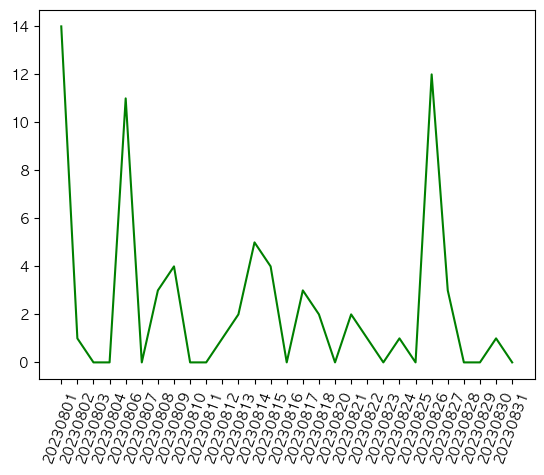

In [43]:
plt.plot(x, y, 'green')

plt.xticks(rotation=70)

plt.show()

### 3. 카테고리별 기사량 그래프

##### 그래프에 필요한 데이터 불러오기

In [58]:
categories = df_category["카테고리"].value_counts()
categories

카테고리
경제      129
IT       32
사회       23
세계       14
생활        4
정치        3
스포츠       1
오피니언      1
Name: count, dtype: int64

##### 카테고리 순서 재정렬

In [59]:
ordered = ['IT', '경제', '사회', '생활', '세계', '스포츠', '오피니언', '정치']
ordered_categories = categories.reindex(ordered)
ordered_categories

카테고리
IT       32
경제      129
사회       23
생활        4
세계       14
스포츠       1
오피니언      1
정치        3
Name: count, dtype: int64

##### x축 데이터 설정

In [60]:
category_x = ordered_categories.index
category_x

Index(['IT', '경제', '사회', '생활', '세계', '스포츠', '오피니언', '정치'], dtype='object', name='카테고리')

In [61]:
category_y = ordered_categories.values
category_y

array([ 32, 129,  23,   4,  14,   1,   1,   3])

##### 카테고리별 기사량 그래프

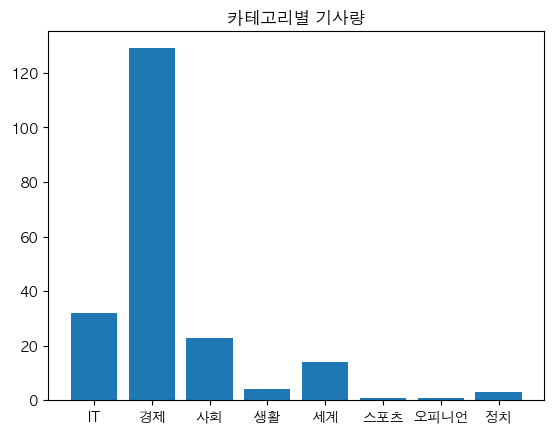

In [63]:
plt.bar(category_x, category_y) # 막대 그래프

plt.title('카테고리별 기사량') # 그래프 제목 설정

plt.show()